In [44]:
import yfinance as yf

#Usual Suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Use PyPortfolioOpt for Calculations
from pypfopt import EfficientFrontier, objective_functions
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting
from pypfopt import DiscreteAllocation
from pypfopt.plotting import plot_weights

In [45]:
#Create a Portfolio
symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'HSBC', 'TSLA', 'LLY', 'TSM', 'AVGO', 'UNH', 'JPM', 'NVO', 'V', 'WMT']

portfolio = yf.download(symbols, start="2018-01-01", end="2024-01-09")['Adj Close']

portfolio.tail()

[*********************100%***********************]  16 of 16 completed


,AAPL,AMZN,AVGO,GOOGL,HSBC,JPM,LLY,META,MSFT,NVDA,NVO,TSLA,TSM,UNH,V,WMT
Date,,,,,,,,,,,,,,,,
2024-01-02,185.639999,149.929993,1085.380005,138.169998,40.119999,171.025406,592.200012,346.290009,370.869995,481.679993,102.110001,248.419998,101.529999,539.340027,258.869995,159.289993
2024-01-03,184.250000,148.470001,1058.579956,138.919998,40.000000,170.279999,617.700012,344.470001,370.600006,475.690002,103.620003,238.449997,100.169998,542.030029,257.980011,159.300003
2024-01-04,181.910004,144.570007,1049.010010,136.389999,40.310001,171.410004,614.500000,347.119995,367.940002,479.980011,107.629997,237.929993,99.129997,545.419983,259.609985,157.759995
2024-01-05,181.179993,145.240005,1049.280029,135.729996,40.740002,172.270004,618.549988,351.950012,367.750000,490.970001,105.980003,237.490005,99.610001,537.380005,259.690002,156.710007
2024-01-08,185.559998,149.100006,1074.849976,138.839996,41.430000,172.020004,626.030029,358.660004,374.690002,522.530029,106.400002,240.449997,102.239998,536.520020,262.540009,158.250000


In [46]:
market_prices = yf.download("SPY", start='2018-01-01', end='2024-01-09')["Adj Close"]
market_prices.head()

[*********************100%***********************]  1 of 1 completed


Date
2018-01-02    243.072220
2018-01-03    244.609741
2018-01-04    245.640701
2018-01-05    247.277649
2018-01-08    247.729874
Name: Adj Close, dtype: float64

In [47]:
mcap_list = [2887528602146,2847485504798,1779024240000,1591234029632,1337923418000,951543073778,800618915000,742972739122,598433789132,523534381487,505591814520,496694131594,493842044810,485724502996,485130308675,434122684609
]
mcaps = dict(zip(symbols, mcap_list))
mcaps

{'AAPL': 2887528602146,
 'MSFT': 2847485504798,
 'GOOGL': 1779024240000,
 'AMZN': 1591234029632,
 'NVDA': 1337923418000,
 'META': 951543073778,
 'HSBC': 800618915000,
 'TSLA': 742972739122,
 'LLY': 598433789132,
 'TSM': 523534381487,
 'AVGO': 505591814520,
 'UNH': 496694131594,
 'JPM': 493842044810,
 'NVO': 485724502996,
 'V': 485130308675,
 'WMT': 434122684609}

In [48]:
#Calculate Sigma and Delta to get implied market returns
#Ledoit-Wolf is a particular form of shrinkage, where the shrinkage coefficient is computed using O?
S = risk_models.CovarianceShrinkage(portfolio).ledoit_wolf()

delta = black_litterman.market_implied_risk_aversion(market_prices)
S

,AAPL,AMZN,AVGO,GOOGL,HSBC,JPM,LLY,META,MSFT,NVDA,NVO,TSLA,TSM,UNH,V,WMT
AAPL,0.100636,0.069076,0.071062,0.065864,0.027270,0.043696,0.031240,0.076512,0.070624,0.102510,0.027342,0.092532,0.060665,0.040949,0.054103,0.025515
AMZN,0.069076,0.124909,0.063432,0.073118,0.023640,0.032553,0.024931,0.090507,0.073203,0.109026,0.021693,0.094062,0.057306,0.029711,0.046815,0.023785
AVGO,0.071062,0.063432,0.132807,0.062145,0.034185,0.053810,0.027204,0.072684,0.067864,0.120007,0.028471,0.100174,0.077369,0.041476,0.054563,0.021456
GOOGL,0.065864,0.073118,0.062145,0.097657,0.027222,0.042494,0.028561,0.087505,0.071173,0.100053,0.026596,0.078160,0.056372,0.036953,0.051845,0.021311
HSBC,0.027270,0.023640,0.034185,0.027222,0.074238,0.051556,0.010862,0.028179,0.026001,0.039027,0.010299,0.035575,0.035756,0.023839,0.033478,0.010984
JPM,0.043696,0.032553,0.053810,0.042494,0.051556,0.093057,0.023616,0.043139,0.042098,0.059181,0.018859,0.052825,0.043883,0.041292,0.051156,0.018475
LLY,0.031240,0.024931,0.027204,0.028561,0.010862,0.023616,0.089132,0.030020,0.034126,0.036108,0.038948,0.017616,0.019438,0.036978,0.027683,0.020465
META,0.076512,0.090507,0.072684,0.087505,0.028179,0.043139,0.030020,0.181719,0.077415,0.118207,0.028324,0.091499,0.062459,0.032155,0.055668,0.020731
MSFT,0.070624,0.073203,0.067864,0.071173,0.026001,0.042098,0.034126,0.077415,0.090926,0.106120,0.029818,0.084023,0.057100,0.042353,0.055018,0.026050
NVDA,0.102510,0.109026,0.120007,0.100053,0.039027,0.059181,0.036108,0.118207,0.106120,0.262176,0.041261,0.151719,0.114698,0.050416,0.076561,0.031693


<AxesSubplot:>

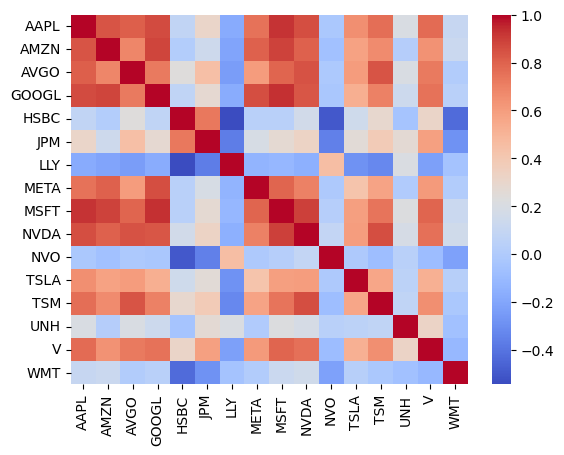

In [49]:
#Visualize the Covariant Correlation
sns.heatmap(S.corr(), cmap='coolwarm')

In [50]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

AAPL     0.211242
AMZN     0.212953
AVGO     0.205488
GOOGL    0.202686
HSBC     0.101325
JPM      0.139221
LLY      0.103801
META     0.233411
MSFT     0.208935
NVDA     0.311187
NVO      0.097504
TSLA     0.278355
TSM      0.183611
UNH      0.125312
V        0.160480
WMT      0.084212
dtype: float64

<AxesSubplot:>

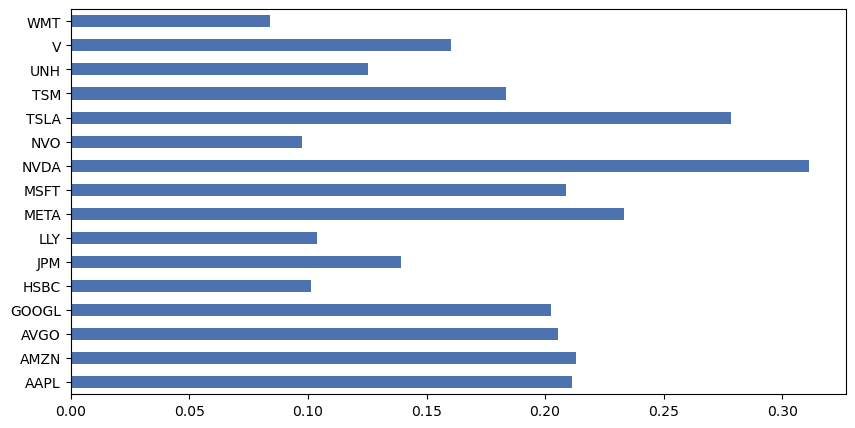

In [51]:
#What am I looking at here?
market_prior.plot.barh(figsize=(10,5))

## Integrating Views

In [52]:
viewdict = {
    'AAPL':0.10,
    'MSFT':0.10,
    'META':0.05,
    'AMZN':0.30,
    'GOOGL':0.02,
    'UNH':0.01,
    'AVGO':0.15,
    'V':0.09,
    'TSM':0.16,
    'JPM':0.07,
    'WMT':0.01,
    'HSBC':-0.23,
    'LLY':0.16,
    'NVO':0.10,
    'NVDA':-0.09,
    'TSLA':0.30,
}

bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

## Creating Confidence

intervals = [
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (-0.1, 0),
    (0.1, 0.2),
    (0.08, 0.12),
    (0.1, 0.9),
    (0, 0.3),
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (-0.1, 0),
]

variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print(variances)
omega = np.diag(variances)

[0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.00039999999999999986, 0.16000000000000003, 0.0225, 0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.0025000000000000005]


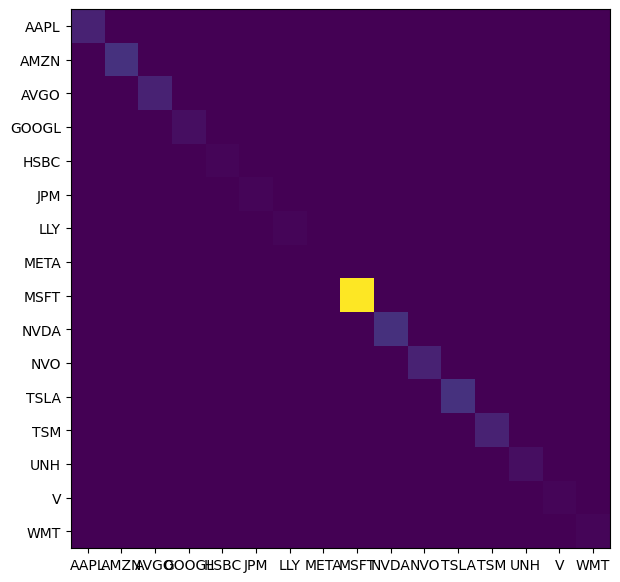

In [53]:
## Posterior Estimated Returns

fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [54]:
# We are using the shortcut to automatically compute market-implied prior
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=viewdict, omega=omega)

# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
             index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
AAPL,0.211242,0.113357,0.10
AMZN,0.212953,0.160003,0.30
AVGO,0.205488,0.116185,0.15
GOOGL,0.202686,0.069590,0.02
HSBC,0.101325,0.020339,-0.23
JPM,0.139221,0.056487,0.07
LLY,0.103801,0.069345,0.16
META,0.233411,0.101963,0.05
MSFT,0.208935,0.101096,0.10
NVDA,0.311187,0.001284,-0.09


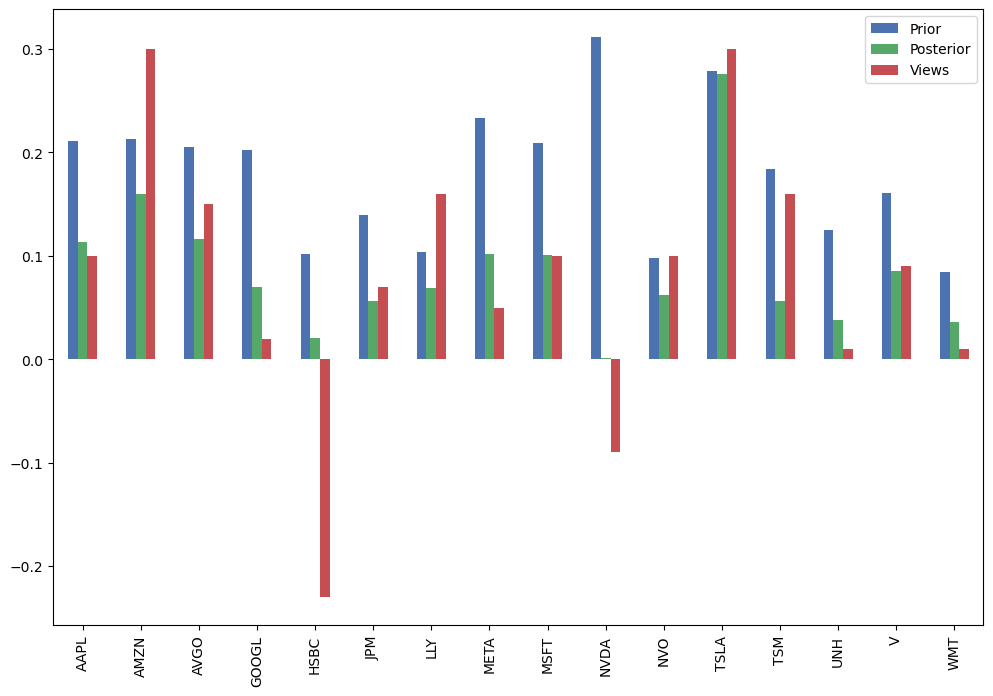

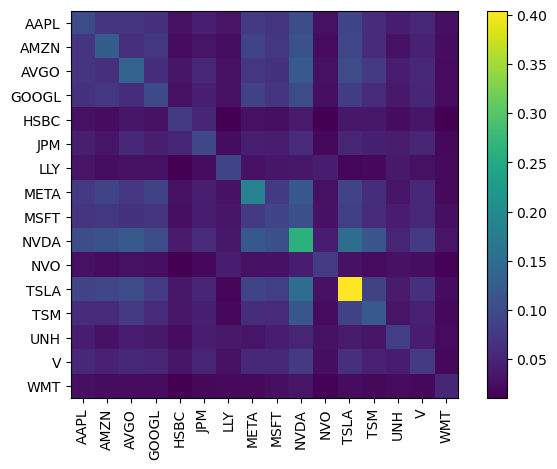

In [55]:
rets_df.plot.bar(figsize=(12,8)); S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);



## Portfolio Allocation

c:\Users\stunt\anaconda3\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


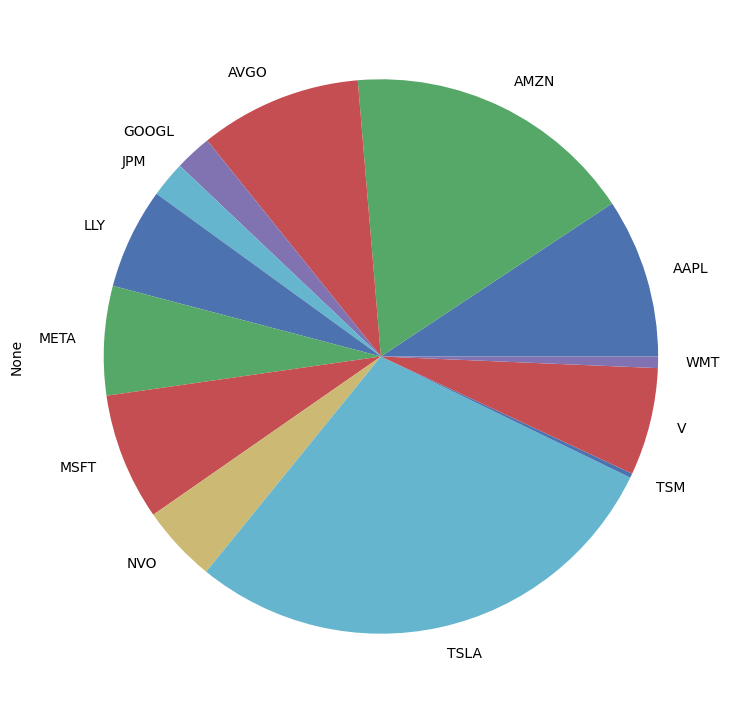

In [56]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

pd.Series(weights).plot.pie(figsize=(9,9));

Expected annual return: 15.7%
Annual volatility: 31.1%
Sharpe Ratio: 0.44


c:\Users\stunt\anaconda3\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
c:\Users\stunt\anaconda3\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(0.15708432737021483, 0.31098645958869664, 0.44080481044582887)

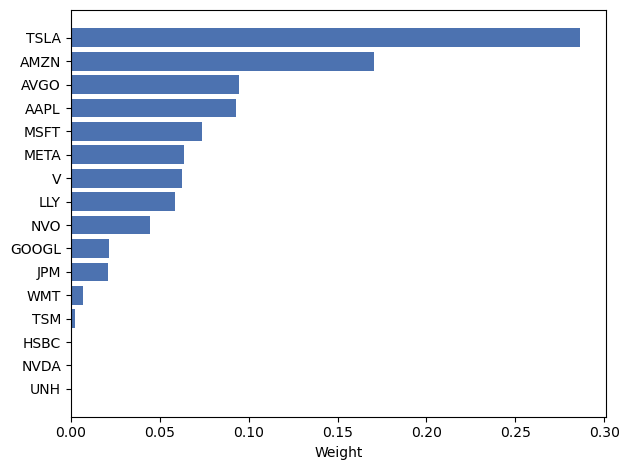

In [57]:
# Maximum Sharpe
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()

plot_weights(weights)
ef.portfolio_performance(verbose = True, risk_free_rate = 0.009)